<center><h1> Exploratory Data Analysis of car dataseet 

In this notebook, I will explore and analyze my data, visuliaze connections between features and do some statistic manipulations to show main characteristics of data. First I will import data, that "page-scarper.py" got from [cars.kg](cars.kg) and saved in "cars_raw_data.csv". I called raw, because later I will clean the data: fill missing values, detect and maybe eliminate outliers, and rescale data(standartization, normalization).

I will import pandas, which is a library for data analysis, and you can see first 5 rows and last five raws of the data.

In [85]:
import pandas as pd 
pd.set_option('float_format', '{:.3f}'.format)
car_data = pd.read_csv("..\\src\\data_loading\\cars_raw_data.csv")
car_data.head(5)

,Год выпуска,КПП,Мощность,Объём,Привод,Пробег,Руль,Тип кузова,Топливо,Цвет,Цена
0,1995.000,механика,150.000,2.000,задний,nan,NaN,седан,бензин,бордовый,4900.000
1,1993.000,автомат,125.000,2.800,полный подключаемый,268701.000,правый,внедорожник / пикап,дизель,синий,6000.000
2,1997.000,автомат,190.000,2.000,NaN,220000.000,правый,седан,бензин,серебряный,3100.000
3,2009.000,механика,298.000,3.000,полный подключаемый,120000.000,левый,универсал,дизель,черный,17000.000
4,2004.000,механика,160.000,3.000,полный подключаемый,200000.000,левый,внедорожник / пикап,дизель,темно-синий,7000.000


In [86]:
car_data.tail(5)

,Год выпуска,КПП,Мощность,Объём,Привод,Пробег,Руль,Тип кузова,Топливо,Цвет,Цена
7355,2005.000,механика,265.000,2.500,постоянный полный,200000.000,правый,кроссовер,бензин,синий,9000.000
7356,2002.000,автомат,160.000,2.400,передний,270000.000,правый,минивэн / бус,бензин,белый жемчуг,5000.000
7357,2002.000,механика,116.000,1.800,передний,nan,левый,универсал,бензин,серый,2700.000
7358,2005.000,автомат,175.000,2.500,постоянный полный,230000.000,левый,универсал,бензин,синий,7800.000
7359,2012.000,автомат,nan,2.500,передний,139000.000,левый,седан,бензин,черный,16500.000


The very first thing I do, is check the shape of our dataframe. As we saw earlier above we can see that there are 7360 rows (examples) and 11 columns (features). And function below confirms this. 

In [87]:
car_data.shape

(7360, 11)

Next we can see the quantity of missing values in each of the columns. We can see that some of the features have a lot of missing values, and some not so much. I will go two ways, first I will create a model with a dataset where all the NaN values were dropped, and second I will impute the NaN values and make a model. 

In [92]:
car_data.isnull().sum()

Год выпуска      96
КПП             177
Мощность       1588
Объём           250
Привод          622
Пробег         2358
Руль            404
Тип кузова       20
Топливо         162
Цвет            593
Цена              0
dtype: int64

Next I would like to see detailed statistical summary of data. From the summary, we can see that mean of data and standart deviation have extreme values, and looking at max values at dataset, I can suggest that maximum values skewed the mean and std methods, later I will eliminate or impute those extreme values in dataset, also in next summary we can see the datatype of each column that we have.

In [88]:
car_data.describe()

,Год выпуска,Мощность,Объём,Пробег,Цена
count,7264.000,5772.000,7110.000,5002.000,7360.000
mean,2005.280,1925003420886.620,117997.289,1846469696291872.250,124513.892
std,7.055,146249479561645.906,8440245.233,130412158247654592.000,9013470.731
min,1961.000,1.000,0.000,1.000,0.000
25%,2001.000,136.000,2.000,39885.000,4000.000
50%,2004.000,180.000,2.400,116339.500,7800.000
75%,2011.000,250.000,3.200,179000.000,18889.750
max,2018.000,11111111111111112.000,705435466.000,9223372036854775808.000,773152600.000


In [89]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7360 entries, 0 to 7359
Data columns (total 11 columns):
Год выпуска    7264 non-null float64
КПП            7183 non-null object
Мощность       5772 non-null float64
Объём          7110 non-null float64
Привод         6738 non-null object
Пробег         5002 non-null float64
Руль           6956 non-null object
Тип кузова     7340 non-null object
Топливо        7198 non-null object
Цвет           6767 non-null object
Цена           7360 non-null float64
dtypes: float64(5), object(6)
memory usage: 460.0+ KB


Next, I would want to see the correlation matrix between each of the continous(numeric) features. By now looking at summary above, I now that dataset has extreme values in the data, each one of continious variables contains extreme values, which we need to eliminate, or make it NaN and impute, because if we won't, it will make a huge affect on correlations and predictions. In the plot below we can see that correlation between continous variables is very low, it is due to the skewed data. There is no meaining at keeping analysis with this kind of data, at first I will eliminate extreme values just to see important relationships, I will not change dataset, the dataset will be changed and cleaned in "Cars-Data-Cleaning" notebook

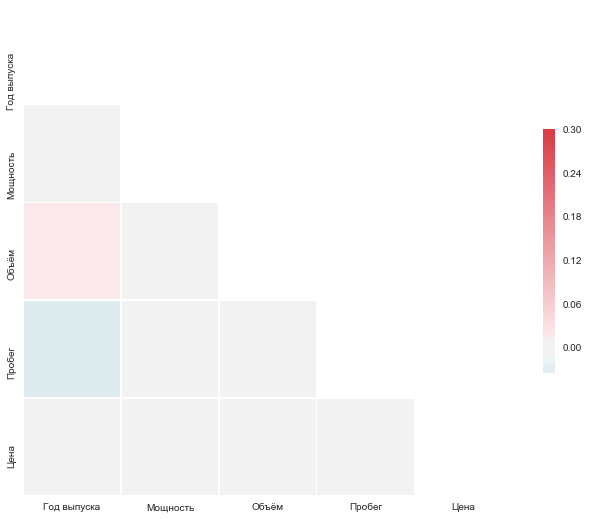

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

sns.set(style = "white")
corr = car_data.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In the dataset categorical features don't have extreme values, and continuous feature "Год выпуска" doesn't have extreme values too. I think it is due to the way people could post advertisements. Categorical features and year feature could be inputed via selection, and continous numbers could be of any range. Because some features of data have a lot of ouliers,

In [142]:
quantile = car_data["Пробег"].quantile(0.1)

In [143]:
quantile

169.0